In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manojpk7724","key":"a55d002136bfe994a10d4cc806fcefb7"}'}

In [ ]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gauravduttakiit/agricultural-pests-dataset

100% 102M/102M [00:06<00:00, 22.2MB/s]
100% 102M/102M [00:06<00:00, 16.8MB/s]


In [ ]:
! unzip agricultural-pests-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/test/earwig/earwig (307).jpg  
  inflating: dataset/test/earwig/earwig (308).jpg  
  inflating: dataset/test/earwig/earwig (309).jpg  
  inflating: dataset/test/earwig/earwig (31).jpg  
  inflating: dataset/test/earwig/earwig (315).jpg  
  inflating: dataset/test/earwig/earwig (33).jpg  
  inflating: dataset/test/earwig/earwig (331).jpg  
  inflating: dataset/test/earwig/earwig (334).jpg  
  inflating: dataset/test/earwig/earwig (338).jpg  
  inflating: dataset/test/earwig/earwig (34).jpg  
  inflating: dataset/test/earwig/earwig (343).jpg  
  inflating: dataset/test/earwig/earwig (348).jpg  
  inflating: dataset/test/earwig/earwig (35).jpg  
  inflating: dataset/test/earwig/earwig (353).jpg  
  inflating: dataset/test/earwig/earwig (358).jpg  
  inflating: dataset/test/earwig/earwig (367).jpg  
  inflating: dataset/test/earwig/earwig (368).jpg  
  inflating: dataset/test/earwig/earwig (37).jpg  
  inflating: datas

Model-1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = "/content/dataset/train"
test_data_dir = "/content/dataset/test"

In [ ]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
137/137 [==============================] - 60s 419ms/step - loss: 2.4751 - accuracy: 0.1045 - val_loss: 2.4167 - val_accuracy: 0.1719
Epoch 2/10
137/137 [==============================] - 57s 417ms/step - loss: 2.3118 - accuracy: 0.2026 - val_loss: 2.2155 - val_accuracy: 0.2197
Epoch 3/10
137/137 [==============================] - 59s 431ms/step - loss: 2.1508 - accuracy: 0.2601 - val_loss: 1.9908 - val_accuracy: 0.3557
Epoch 4/10
137/137 [==============================] - 59s 428ms/step - loss: 1.9890 - accuracy: 0.3250 - val_loss: 1.8566 - val_accuracy: 0.3658
Epoch 5/10
137/137 [==============================] - 56s 410ms/step - loss: 1.8845 - accuracy: 0.3631 - val_loss: 1.7568 - val_accuracy: 0.4090
Epoch 6/10
137/137 [==============================] - 56s 410ms/step - loss: 1.7797 - accuracy: 0.4002 - val_loss: 1.6968 - val_accuracy: 0.4366
Epoch 7/10
137/137 [==============================] - 59s 432ms/step - loss: 1.6735 - accuracy: 0.4336 - val_loss: 1.7327 - val_ac

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

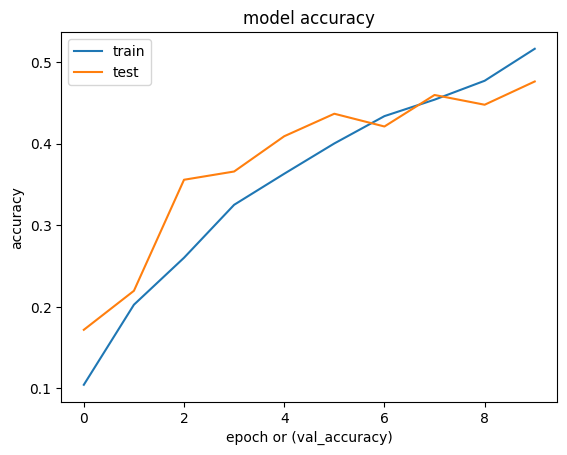

In [ ]:
#summarize model for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

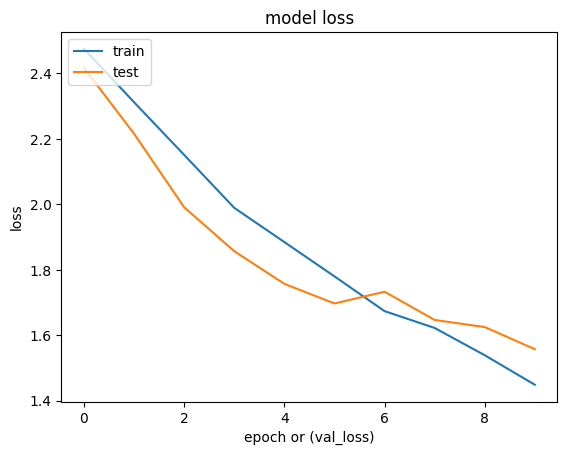

In [ ]:
#summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
score = model.evaluate(test_generator, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.4749772548675537


Model-2

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

train_data_dir = "/content/dataset/train"
test_data_dir = "/content/dataset/test"

img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 30

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

def create_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(12, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

model1 = create_model(input_shape)

optimizer = Adam(lr=0.0001)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.


Epoch 1/30
137/137 [==============================] - 62s 438ms/step - loss: 2.4859 - accuracy: 0.1206 - val_loss: 2.3955 - val_accuracy: 0.1700
Epoch 2/30
137/137 [==============================] - 60s 442ms/step - loss: 2.3541 - accuracy: 0.1859 - val_loss: 2.2225 - val_accuracy: 0.2454
Epoch 3/30
137/137 [==============================] - 59s 428ms/step - loss: 2.2318 - accuracy: 0.2278 - val_loss: 2.2022 - val_accuracy: 0.2491
Epoch 4/30
137/137 [==============================] - 60s 438ms/step - loss: 2.1436 - accuracy: 0.2627 - val_loss: 1.9674 - val_accuracy: 0.3520
Epoch 5/30
137/137 [==============================] - 60s 438ms/step - loss: 2.0097 - accuracy: 0.3149 - val_loss: 1.9520 - val_accuracy: 0.3658
Epoch 6/30
137/137 [==============================] - 60s 437ms/step - loss: 1.9534 - accuracy: 0.3307 - val_loss: 1.8191 - val_accuracy: 0.3759
Epoch 7/30
137/137 [==============================] - 67s 485ms/step - loss: 1.8663 - accuracy: 0.3713 - val_loss: 1.7515 - val_ac

In [ ]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

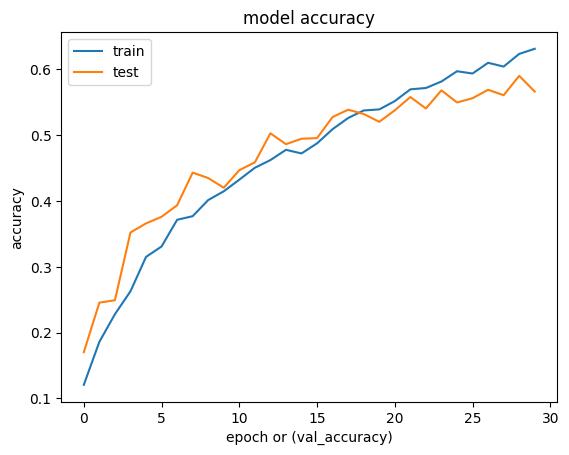

In [ ]:
#summarize model for accuracy
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

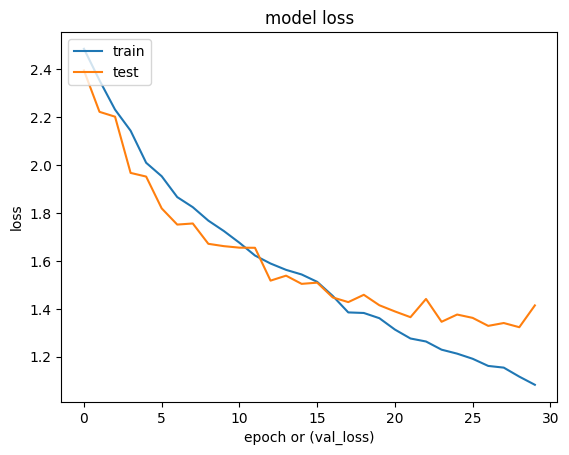

In [ ]:
#summarize history for loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
score = model1.evaluate(test_generator, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.5650591254234314


Model-2 Changes:

In this updated code, we have added data augmentation to the train_datagen ImageDataGenerator to randomly rotate, shift, shear, zoom, and flip the images during training, which can help the model generalize better to new data.

We have also added a dropout layer after the Dense layer to prevent overfitting and reduce the gap between the train and test accuracy.

Finally, we have decreased the learning rate of the optimizer to help the model converge better and avoid overshooting the optimal weights during training.

Model-3-VGG16

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16

train_data_dir = "/content/dataset/train"
test_data_dir = "/content/dataset/test"

img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 30

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

def create_model(input_shape):
    model = Sequential()

    # First Block
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Second Block
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Third Block
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fourth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fifth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Sixth Block
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=12, activation='softmax'))

    return model

model2 = create_model(input_shape)

# Use ReduceLROnPlateau callback for learning rate scheduling
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)

optimizer = Adam(lr=0.0001)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.
58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/30
137/137 [==============================] - 70s 469ms/step - loss: 4.6742 - accuracy: 0.3069 - val_loss: 2.3430 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 2/30
137/137 [==============================] - 62s 450ms/step - loss: 2.3754 - accuracy: 0.3800 - val_loss: 1.9774 - val_accuracy: 0.5285 - lr: 0.0010
Epoch 3/30
137/137 [==============================] - 62s 449ms/step - loss: 2.1753 - accuracy: 0.3832 - val_loss: 1.9225 - val_accuracy: 0.5744 - lr: 0.0010
Epoch 4/30
137/137 [==============================] - 61s 444ms/step - loss: 2.1261 - accuracy: 0.3855 - val_loss: 1.8441 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 5/30
137/137 [==============================] - 61s 448ms/step - loss: 2.1554 - accuracy: 0.3695 - val_loss: 1.9438 - val_accuracy: 0.5165 - lr: 0.0010
Epoch 6/30
137/137 [==============================] - ETA: 0s - loss: 2.1891 - accuracy: 0.3608
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
137/137 [=============================

In [ ]:
model2.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

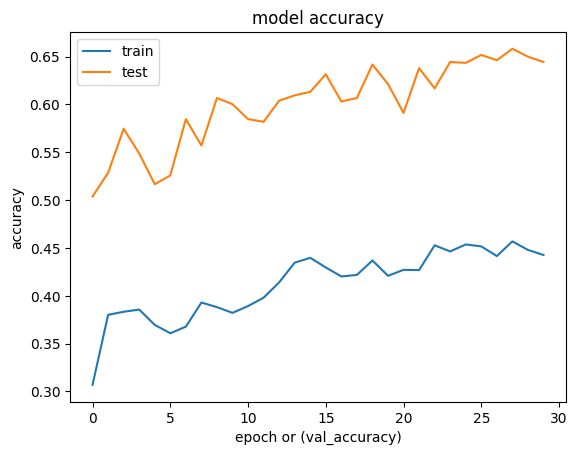

In [ ]:
#summarize model for accuracy
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

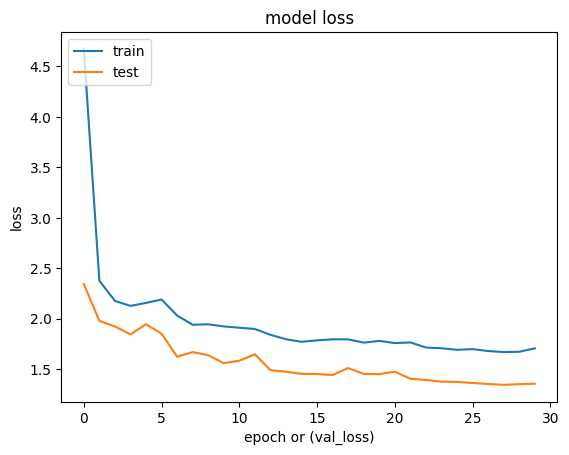

In [ ]:
#summarize history for loss
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
score = model2.evaluate(test_generator, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.6433120965957642


Model-3 Changes:
In this updated code, we have:

Used the VGG16 as a starting point for our specific task.

Added L2 regularization to the dense layer to help prevent overfitting.

Added the ReduceLROnPlateau callback to adjust the learning rate during training based on the validation accuracy.

Used the Adam optimizer with a learning rate of 0.0001.

Model-4-VGG19

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define image dimensions and number of classes
img_height, img_width = 224, 224
num_classes = 12

# Define train and test data directories
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_model(input_shape):
    model = Sequential()

    # First Block
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Second Block
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Third Block
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fourth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Fifth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Sixth Block
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dense(units=12, activation='softmax'))

    return model

model3 = create_model(input_shape)

# Use ReduceLROnPlateau callback for learning rate scheduling
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)

# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model3.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    callbacks=[lr_scheduler])


Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.
Epoch 1/10
138/138 [==============================] - 125s 901ms/step - loss: 1.9421 - accuracy: 0.4432 - val_loss: 1.2553 - val_accuracy: 0.5869 - lr: 0.0010
Epoch 2/10
138/138 [==============================] - 69s 497ms/step - loss: 1.1541 - accuracy: 0.6323 - val_loss: 1.3416 - val_accuracy: 0.5569 - lr: 0.0010
Epoch 3/10
138/138 [==============================] - 75s 544ms/step - loss: 0.9583 - accuracy: 0.6876 - val_loss: 1.1605 - val_accuracy: 0.6369 - lr: 0.0010
Epoch 4/10
138/138 [==============================] - 67s 482ms/step - loss: 0.7706 - accuracy: 0.7511 - val_loss: 1.0982 - val_accuracy: 0.6488 - lr: 0.0010
Epoch 5/10
138/138 [==============================] - 71s 514ms/step - loss: 0.7170 - accuracy: 0.7663 - val_loss: 1.1024 - val_accuracy: 0.6615 - lr: 0.0010
Epoch 6/10
138/138 [==============================] - 66s 477ms/step - loss: 0.6532 - accuracy: 0.7820 - val_loss: 1.1030 -

In [ ]:
model3.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

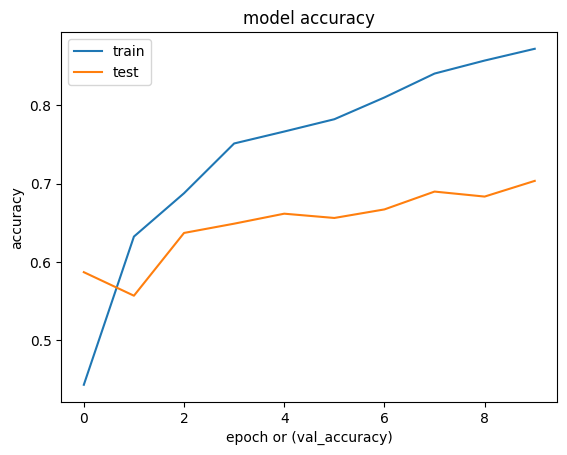

In [ ]:
#summarize model for accuracy
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

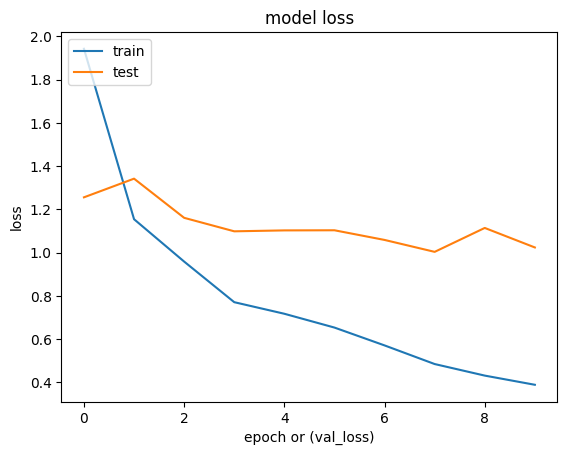

In [ ]:
#summarize history for loss
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model3.evaluate(test_data)
print('Test accuracy:', test_acc)

35/35 [==============================] - 6s 165ms/step - loss: 1.0235 - accuracy: 0.7034
Test accuracy: 0.7033666968345642


Model-5-VGG19

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define image dimensions and number of classes
img_height, img_width = 224, 224
num_classes = 12

# Define train and test data directories
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_model(input_shape):
    model = Sequential()

    # First Block
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    # Second Block
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    # Third Block
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.5))

    # Fourth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.5))

    # Fifth Block
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Seventh Block
    model.add(Dense(units=4096, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(units=1000, activation='softmax'))

    return model

model4 = create_model(input_shape)

opt = Adam(learning_rate=1e-4)
model4.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for more epochs with regularization
history = model4.fit(train_data,
                    epochs=25,
                    validation_data=test_data,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)])

Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.
80134624/80134624 [==============================] - 5s 0us/step
Epoch 1/25
138/138 [==============================] - 77s 508ms/step - loss: 2.1083 - accuracy: 0.3010 - val_loss: 1.5948 - val_accuracy: 0.5123 - lr: 1.0000e-04
Epoch 2/25
138/138 [==============================] - 68s 491ms/step - loss: 1.6115 - accuracy: 0.4803 - val_loss: 1.3547 - val_accuracy: 0.5842 - lr: 1.0000e-04
Epoch 3/25
138/138 [==============================] - 67s 487ms/step - loss: 1.4365 - accuracy: 0.5342 - val_loss: 1.2482 - val_accuracy: 0.6051 - lr: 1.0000e-04
Epoch 4/25
138/138 [==============================] - 67s 487ms/step - loss: 1.3022 - accuracy: 0.5823 - val_loss: 1.1438 - val_accuracy: 0.6369 - lr: 1.0000e-04
Epoch 5/25
138/138 [==============================] - 72s 521ms/step - loss: 1.2046 - accuracy: 0.6143 - val_loss: 1.1011 - val_accuracy: 0.6479 - lr: 1.0000e-04
Epoch 6/25
138/138 [===================

In [ ]:
model4.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

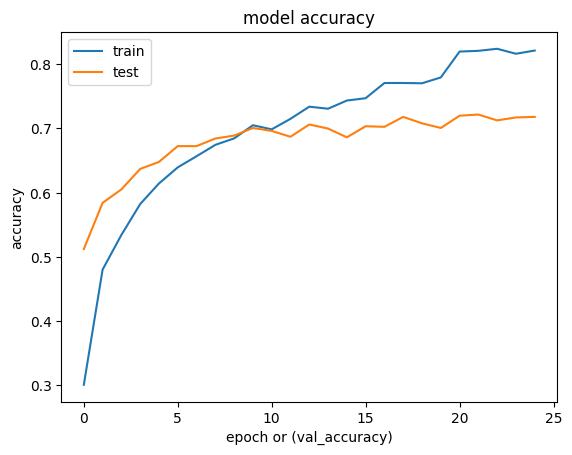

In [ ]:
#summarize model for accuracy
plt.plot(model4.history.history['accuracy'])
plt.plot(model4.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

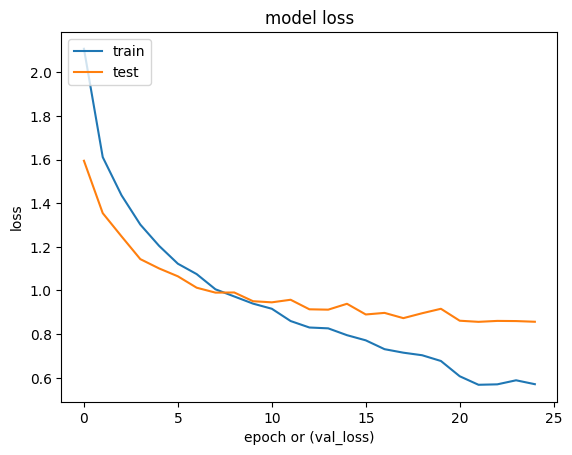

In [ ]:
#summarize history for loss
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model4.evaluate(test_data)
print('Test accuracy:', test_acc)

35/35 [==============================] - 6s 159ms/step - loss: 0.8566 - accuracy: 0.7179
Test accuracy: 0.7179253697395325


Model-6-Inception-V3

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Concatenate,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define image dimensions and number of classes
img_height, img_width = 229, 229
num_classes = 12

# Define train and test data directories
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_inceptionv3_model(input_shape, num_classes):
    # Create model architecture
    model = Sequential()

    # Stem
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='valid', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu'))
    model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))
    model.add(Conv2D(80, (1,1), strides=(1,1), padding='valid', activation='relu'))
    model.add(Conv2D(192, (3,3), strides=(1,1), padding='valid', activation='relu'))
    model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))

    # Inception A
    tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(model.output)
    tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(model.output)
    tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(model.output)
    tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    concat_1 = Concatenate()([tower_1, tower_2, tower_3])

    tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_1)
    tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_1)
    tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_1)
    tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    concat_2 = Concatenate()([tower_1, tower_2, tower_3])

    tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_2)
    tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(concat_2)
    tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_2)
    tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    concat_3 = Concatenate()([tower_1, tower_2, tower_3])

    # Inception B
    tower_1 = Conv2D(192, (1,1), padding='same', activation='relu')(concat_3)
    tower_1 = Conv2D(192, (1,7), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(224, (7,1), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(224, (1,7), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(256, (7,1), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(192, (1,1), padding='same', activation='relu')(concat_3)
    tower_2 = Conv2D(192, (7,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(224, (1,7), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(224, (7,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(256, (1,7), padding='same', activation='relu')(tower_2)

    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_3)
    tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)

    concat_4 = Concatenate()([tower_1, tower_2, tower_3])

    # Inception C
    tower_1 = Conv2D(384, (1,1), padding='same', activation='relu')(concat_4)
    tower_1 = Conv2D(384, (1,3), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(448, (3,1), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(512, (1,3), padding='same', activation='relu')(tower_1)
    tower_1 = Conv2D(512, (3,1), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(384, (1,1), padding='same', activation='relu')(concat_4)
    tower_2 = Conv2D(384, (3,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(448, (1,3), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(512, (3,1), padding='same', activation='relu')(tower_2)
    tower_2 = Conv2D(512, (1,3), padding='same', activation='relu')(tower_2)

    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(concat_4)
    tower_3 = Conv2D(512, (1,1), padding='same', activation='relu')(tower_3)

    concat_5 = Concatenate()([tower_1, tower_2, tower_3])
    gap = GlobalAveragePooling2D()(concat_5)
    dense_1 = Dense(1024, activation='relu')(gap)
    dropout = Dropout(0.4)(dense_1)
    dense_2 = Dense(num_classes, activation='softmax')(dropout)
    model = Model(inputs=model.inputs, outputs=dense_2)
    return model


model5 = create_inceptionv3_model(input_shape, num_classes)

opt = Adam(learning_rate=1e-4)
model5.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model for more epochs with regularization
history = model5.fit(train_data,
                    epochs=25,
                    validation_data=test_data,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)])


Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.
87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/25
138/138 [==============================] - 71s 470ms/step - loss: 1.0705 - accuracy: 0.6960 - val_loss: 0.5638 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 2/25
138/138 [==============================] - 62s 450ms/step - loss: 0.6685 - accuracy: 0.7941 - val_loss: 0.5305 - val_accuracy: 0.8435 - lr: 1.0000e-04
Epoch 3/25
138/138 [==============================] - 62s 446ms/step - loss: 0.5979 - accuracy: 0.8175 - val_loss: 0.4565 - val_accuracy: 0.8581 - lr: 1.0000e-04
Epoch 4/25
138/138 [==============================] - 71s 517ms/step - loss: 0.5464 - accuracy: 0.8275 - val_loss: 0.4566 - val_accuracy: 0.8662 - lr: 1.0000e-04
Epoch 5/25
138/138 [==============================] - 63s 457ms/step - loss: 0.4955 - accuracy: 0.8428 - val_loss: 0.4652 - val_accuracy: 0.8599 - lr: 1.0000e-04
Epoch 6/25
138/138 [===================

In [ ]:
model5.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Exception ignored in: <function _xla_gc_callback at 0x7f9052bdd870>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


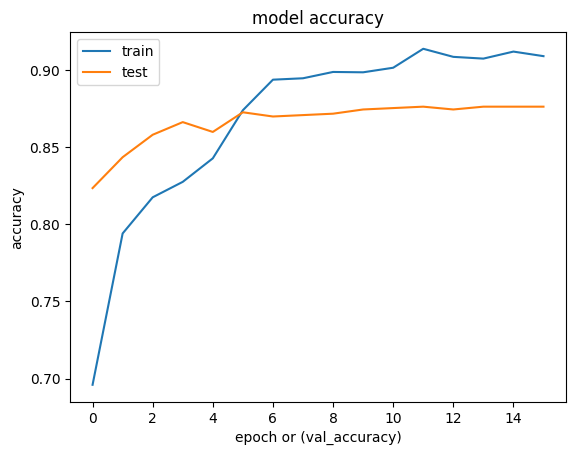

In [ ]:
#summarize model for accuracy
plt.plot(model5.history.history['accuracy'])
plt.plot(model5.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

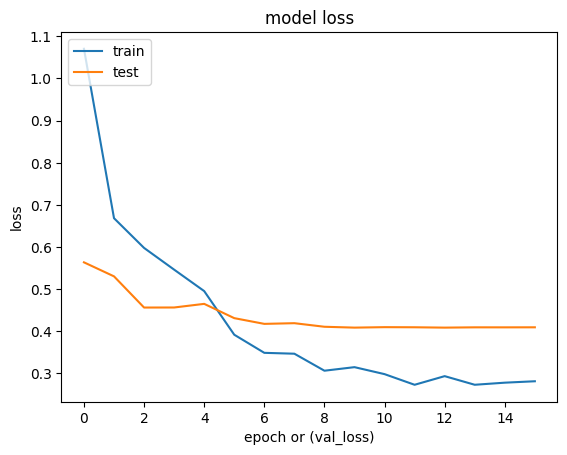

In [ ]:
#summarize history for loss
plt.plot(model5.history.history['loss'])
plt.plot(model5.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model5.evaluate(test_data)
print('Test accuracy:', test_acc)

35/35 [==============================] - 4s 126ms/step - loss: 0.4096 - accuracy: 0.8763
Test accuracy: 0.8762511610984802


Model-7-Inception V3

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define image dimensions and number of classes
img_height, img_width = 224, 224
num_classes = 12

# Define train and test data directories
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Define data augmentation for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data from directory and apply data augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=32,
                                               class_mode='categorical')

# Load test data from directory and apply data augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=32,
                                             class_mode='categorical')

def create_inceptionv3_model(input_shape, num_classes):
    img_input = Input(shape=(229, 229, 3))

    # Stem
    # stem block
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(img_input)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = Conv2D(80, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception blocks
    branch1x1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)

    branch5x5 = Conv2D(48, (1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(branch5x5)

    branch3x3dbl = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    branch3x3dbl = Conv2D(96, (3, 3), padding='same', activation='relu')(branch3x3dbl)
    branch3x3dbl = Conv2D(96, (3, 3), padding='same', activation='relu')(branch3x3dbl)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(32, (1, 1), padding='same', activation='relu')(branch_pool)

    x = Concatenate(axis=3)([branch1x1, branch5x5, branch3x3dbl, branch_pool])
# First Auxiliary Classifier
    auxiliary_output1 = AveragePooling2D((5, 5), strides=(3, 3))(x)
    auxiliary_output1 = Conv2D(128, (1, 1), padding='same', activation='relu')(auxiliary_output1)
    auxiliary_output1 = Flatten()(auxiliary_output1)
    auxiliary_output1 = Dense(1024, activation='relu')(auxiliary_output1)
    auxiliary_output1 = Dropout(0.7)(auxiliary_output1)
    auxiliary_output1 = Dense(num_classes, activation='softmax', name='aux_output1')(auxiliary_output1)

        # Inception blocks continued...
    branch1x1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)

    branch5x5 = Conv2D(48, (1, 5), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(branch5x5)
    branch3x3dbl = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    branch3x3dbl = Conv2D(96, (3, 3), padding='same', activation='relu')(branch3x3dbl)
    branch3x3dbl = Conv2D(96, (3, 3), padding='same', activation='relu')(branch3x3dbl)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(64, (1, 1), padding='same', activation='relu')(branch_pool)

    x = Concatenate(axis=3)([branch1x1, branch5x5, branch3x3dbl, branch_pool])

    # Second Auxiliary Classifier
    auxiliary_output2 = AveragePooling2D((5, 5), strides=(3, 3))(x)
    auxiliary_output2 = Conv2D(128, (1, 1), padding='same', activation='relu')(auxiliary_output2)
    auxiliary_output2 = Flatten()(auxiliary_output2)
    auxiliary_output2 = Dense(1024, activation='relu')(auxiliary_output2)
    auxiliary_output2 = Dropout(0.7)(auxiliary_output2)
    auxiliary_output2 = Dense(12, activation='softmax', name='aux_output2')(auxiliary_output2)

    # Inception blocks continued...
    branch1x1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)

    branch5x5 = Conv2D(48, (1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(branch5x5)

    branch3x3dbl = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    branch3x3dbl = Conv2D(96, (3, 3), padding='same', activation='relu')(branch3x3dbl)
    branch3x3dbl = Conv2D(96, (3, 3), padding='same', activation='relu')(branch3x3dbl)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(64, (1, 1), padding='same', activation='relu')(branch_pool)

    x = Concatenate(axis=3)([branch1x1, branch5x5, branch3x3dbl, branch_pool])

    # Final Classifier
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(12, activation='softmax', name='output')(x)

    # Create model
    model = Model(inputs=img_input, outputs=[x, auxiliary_output1, auxiliary_output2], name='inception_v3')

    return model

model6 = create_inceptionv3_model(input_shape, num_classes)

opt = Adam(learning_rate=1e-4)
model6.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model for more epochs with regularization
history = model6.fit(train_data,
                    epochs=25,
                    validation_data=test_data,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)])


Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.
17225924/17225924 [==============================] - 2s 0us/step
Epoch 1/25
138/138 [==============================] - 63s 436ms/step - loss: 1.3986 - accuracy: 0.5873 - val_loss: 0.6130 - val_accuracy: 0.7980 - lr: 1.0000e-04
Epoch 2/25
138/138 [==============================] - 70s 510ms/step - loss: 0.7009 - accuracy: 0.7779 - val_loss: 0.5427 - val_accuracy: 0.8326 - lr: 1.0000e-04
Epoch 3/25
138/138 [==============================] - 61s 445ms/step - loss: 0.5340 - accuracy: 0.8280 - val_loss: 0.4838 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 4/25
138/138 [==============================] - 62s 446ms/step - loss: 0.4440 - accuracy: 0.8560 - val_loss: 0.4831 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 5/25
138/138 [==============================] - 62s 448ms/step - loss: 0.3806 - accuracy: 0.8792 - val_loss: 0.5130 - val_accuracy: 0.8444 - lr: 1.0000e-04
Epoch 6/25
138/138 [===================

In [ ]:
model6.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

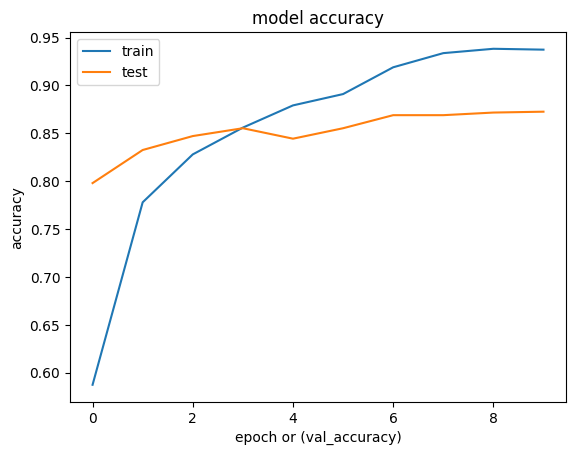

In [ ]:
#summarize model for accuracy
plt.plot(model6.history.history['accuracy'])
plt.plot(model6.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

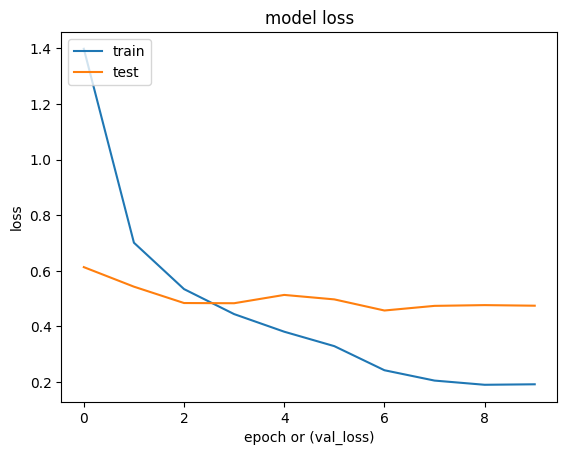

In [ ]:
#summarize history for loss
plt.plot(model6.history.history['loss'])
plt.plot(model6.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model6.evaluate(test_data)
print('Test accuracy:', test_acc)

35/35 [==============================] - 4s 120ms/step - loss: 0.4742 - accuracy: 0.8726
Test accuracy: 0.8726114630699158
